In [1]:
!pip install retina-face
!pip install deepface


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: pytest
    Found existing installation: pytest 8.4.2
    Uninstalling pytest-8.4.2:
      Successfully uninstalled pytest-8.4.2


Saved: /content/cropped_rough2/face_1.jpg
Saved: /content/cropped_rough2/face_2.jpg
Saved: /content/cropped_rough2/face_3.jpg
Saved: /content/cropped_rough2/face_4.jpg
Saved: /content/cropped_rough2/face_5.jpg
Saved: /content/cropped_rough2/face_6.jpg
Saved: /content/cropped_rough2/face_7.jpg
Saved: /content/cropped_rough2/face_8.jpg
Saved: /content/cropped_rough2/face_9.jpg
Saved: /content/cropped_rough2/face_10.jpg
Saved: /content/cropped_rough2/face_11.jpg
Saved: /content/cropped_rough2/face_12.jpg
Saved: /content/cropped_rough2/face_13.jpg
Saved: /content/cropped_rough2/face_14.jpg
Saved: /content/cropped_rough2/face_15.jpg
Saved: /content/cropped_rough2/face_16.jpg
Saved: /content/cropped_rough2/face_17.jpg
Saved: /content/cropped_rough2/face_18.jpg
Saved: /content/cropped_rough2/face_19.jpg
Saved: /content/cropped_rough2/face_20.jpg
Saved: /content/cropped_rough2/face_21.jpg
Saved: /content/cropped_rough2/face_22.jpg
Saved: /content/cropped_rough2/face_23.jpg
Saved: /content/crop

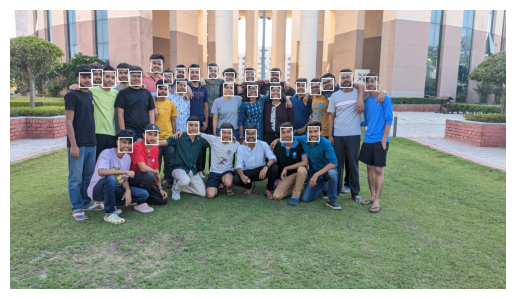

In [11]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
import os
from deepface import DeepFace

# =======================
# Paths
# =======================
img_path = "/content/testing2.jpg"
output_folder = "/content/cropped_rough2"

# =======================
# Load and detect faces
# =======================
img = cv2.imread(img_path)
detected_faces = RetinaFace.detect_faces(img_path)

# Create folder if not exists
os.makedirs(output_folder, exist_ok=True)

# =======================
# Crop and Save Faces
# =======================
counter = 1
for key, face_data in detected_faces.items():
    x1, y1, x2, y2 = face_data["facial_area"]

    cropped_face = img[y1:y2, x1:x2]

    save_path = os.path.join(output_folder, f"face_{counter}.jpg")
    cv2.imwrite(save_path, cropped_face)
    print(f"Saved: {save_path}")

    counter += 1

# =======================
# Draw rectangles on main image
# =======================
for key, face_data in detected_faces.items():
    x1, y1, x2, y2 = face_data["facial_area"]
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 255), 2)

# =======================
# Display final image
# =======================
plt.imshow(img[:, :, ::-1])
plt.axis("off")
plt.show()

# =======================
# Face comparison example
# Uncomment and use when needed
# =======================

# result = DeepFace.verify(
#     img1_path="deep1.jpeg",
#     img2_path="dkt.jpeg",
#     model_name="ArcFace",
#     detector_backend="retinaface"
# )
# print(result)


In [17]:
import os
import pickle
from deepface import DeepFace

DATA_FOLDER = "/content/data2"  # change if needed
OUTPUT_EMBEDDING_FILE = "/content/data_embeddings.pkl"

print("\n🚀 Extracting features from DATA folder...")

data_embeddings = {}

# Load ArcFace model once
model = DeepFace.build_model("ArcFace")

for filename in os.listdir(DATA_FOLDER):

    if filename.lower().endswith(('jpg', 'jpeg', 'png')):
        img_path = os.path.join(DATA_FOLDER, filename)
        try:
            emb = DeepFace.represent(
                img_path=img_path,
                model_name="ArcFace",
                detector_backend="retinaface",
                align=True
            )[0]["embedding"]

            data_embeddings[filename] = emb
            print(f"✔ Extracted → {filename}")

        except Exception as e:
            print(f"❌ Cannot extract {filename}: {e}")

# Save embeddings permanently
with open(OUTPUT_EMBEDDING_FILE, "wb") as f:
    pickle.dump(data_embeddings, f)

print("\n🎉 Feature extraction completed.")
print(f"📁 Saved in: {OUTPUT_EMBEDDING_FILE}")



🚀 Extracting features from DATA folder...
✔ Extracted → CSE_Pankaj Kumar Yadav.jpg
✔ Extracted → CSE_Priya Singh.jpg
✔ Extracted → IT_siddharth ojha.jpg
✔ Extracted → IT_ROSHAN SHARMA.jpeg
✔ Extracted → CSE_AMIT ANAND.jpeg
✔ Extracted → CSE_Shivang Joshi.jpeg
✔ Extracted → CSE_DIVYANSHU SHEKHAR.jpg
✔ Extracted → CSE_Adhitya Rajesh Bingi.jpg
✔ Extracted → CSE_Priyanshu Singh.jpg
✔ Extracted → IT_DHAIRYA GUPTA.jpeg
✔ Extracted → IT_ABHISHEK YADAV.jpg
✔ Extracted → IT_Krishna Kumar.jpg
✔ Extracted → IT_Ankit Kumar.jpeg
✔ Extracted → CSE_Shrey Pant.jpg
✔ Extracted → CSE_Ranjesh roy.jpg
✔ Extracted → CSE_AYUSH DWIVEDI.jpg
✔ Extracted → CSE_ANURAG TRIPATHI.jpg
✔ Extracted → CSE_Gyana kashyap.jpg
✔ Extracted → IT_Abhirajkar Bajpai.jpg
✔ Extracted → CSE_ADARSH KUMAR.jpg
✔ Extracted → CSE_Divakar Rajput.jpg
✔ Extracted → IT_ANURAG KUMAR.jpg
✔ Extracted → CSE_Adarsh Anand.jpg
✔ Extracted → CSE_Shishir Singh.jpg
✔ Extracted → CSE_Yashasvi Rawat.jpg
✔ Extracted → CSE_Akshyat Pathak.jpg
✔ Extracte

In [19]:
import os
import numpy as np
import pickle
from deepface import DeepFace

EMBED_FILE = "/content/data_embeddings.pkl"  # must match previous
STRICT_THRESHOLD = 0.6  # change if needed

# cosine distance
def cosine_distance(e1, e2):
    e1 = np.array(e1)
    e2 = np.array(e2)
    return 1 - (np.dot(e1, e2) / (np.linalg.norm(e1) * np.linalg.norm(e2)))


# Load stored features
with open(EMBED_FILE, "rb") as f:
    data_embeddings = pickle.load(f)

print(f"🔑 Loaded {len(data_embeddings)} saved embeddings")

# Load model once
model = DeepFace.build_model("ArcFace")

def match_folder(TEST_FOLDER):

    print(f"\n🔍 Testing folder: {TEST_FOLDER}")
    for filename in os.listdir(TEST_FOLDER):

        if not filename.lower().endswith(('jpg', 'jpeg', 'png')):
            continue

        test_path = os.path.join(TEST_FOLDER, filename)

        try:
            # get embedding of test image
            test_emb = DeepFace.represent(
                img_path=test_path,
                model_name="ArcFace",
                detector_backend="retinaface",
                align=True
            )[0]["embedding"]

            best_match = None
            best_dist = 9999

            # Compare with stored embeddings
            for base_file, base_emb in data_embeddings.items():
                dist = cosine_distance(test_emb, base_emb)

                if dist < best_dist:
                    best_dist = dist
                    best_match = base_file

            if best_dist < STRICT_THRESHOLD:
                print(f"🏆 {filename} → BEST MATCH = {best_match} (distance={best_dist:.4f})")
            else:
                print(f"🚫 {filename} → NO MATCH FOUND")

        except Exception as e:
            print(f"❌ Cannot process {filename}: {e}")


🔑 Loaded 75 saved embeddings


In [20]:
match_folder("/content/cropped_rough2")  # low quality images



🔍 Testing folder: /content/cropped_rough2
🏆 face_24.jpg → BEST MATCH = CSE_HIMANSHU JAIN.jpg (distance=0.5102)
🏆 face_4.jpg → BEST MATCH = CSE_DEVANSH GOYAL.jpg (distance=0.4053)
🚫 face_30.jpg → NO MATCH FOUND
🚫 face_1.jpg → NO MATCH FOUND
🚫 face_19.jpg → NO MATCH FOUND
🏆 face_13.jpg → BEST MATCH = CSE_Priya Singh.jpg (distance=0.5484)
🏆 face_5.jpg → BEST MATCH = CSE_Harsha Vardhan.jpg (distance=0.5732)
🚫 face_29.jpg → NO MATCH FOUND
🏆 face_3.jpg → BEST MATCH = CSE_ABHISHEK GUPTA.jpg (distance=0.4729)
🏆 face_26.jpg → BEST MATCH = CSE_DIVYANSHU SHEKHAR.jpg (distance=0.3722)
🏆 face_8.jpg → BEST MATCH = CSE_DEVANSH GOYAL.jpg (distance=0.5453)
🏆 face_9.jpg → BEST MATCH = CSE_Naveen Karaka.jpeg (distance=0.4517)
🏆 face_12.jpg → BEST MATCH = CSE_Saumya Laddha.jpg (distance=0.4613)
🚫 face_22.jpg → NO MATCH FOUND
🏆 face_20.jpg → BEST MATCH = CSE_Anshu Raj.jpg (distance=0.5021)
🏆 face_17.jpg → BEST MATCH = CSE_Kuldeep Singh.jpg (distance=0.4160)
🏆 face_18.jpg → BEST MATCH = CSE_DEVANSH GOYAL.j